In [21]:
def get_static_sol(filename):
    file = open(filename, 'r')
    X = []
    Y = []
    for line in file:
        aux1, aux2 = line.split()
        X.append(float(aux1))
        Y.append(float(aux2))
    file.close()
    return X, Y

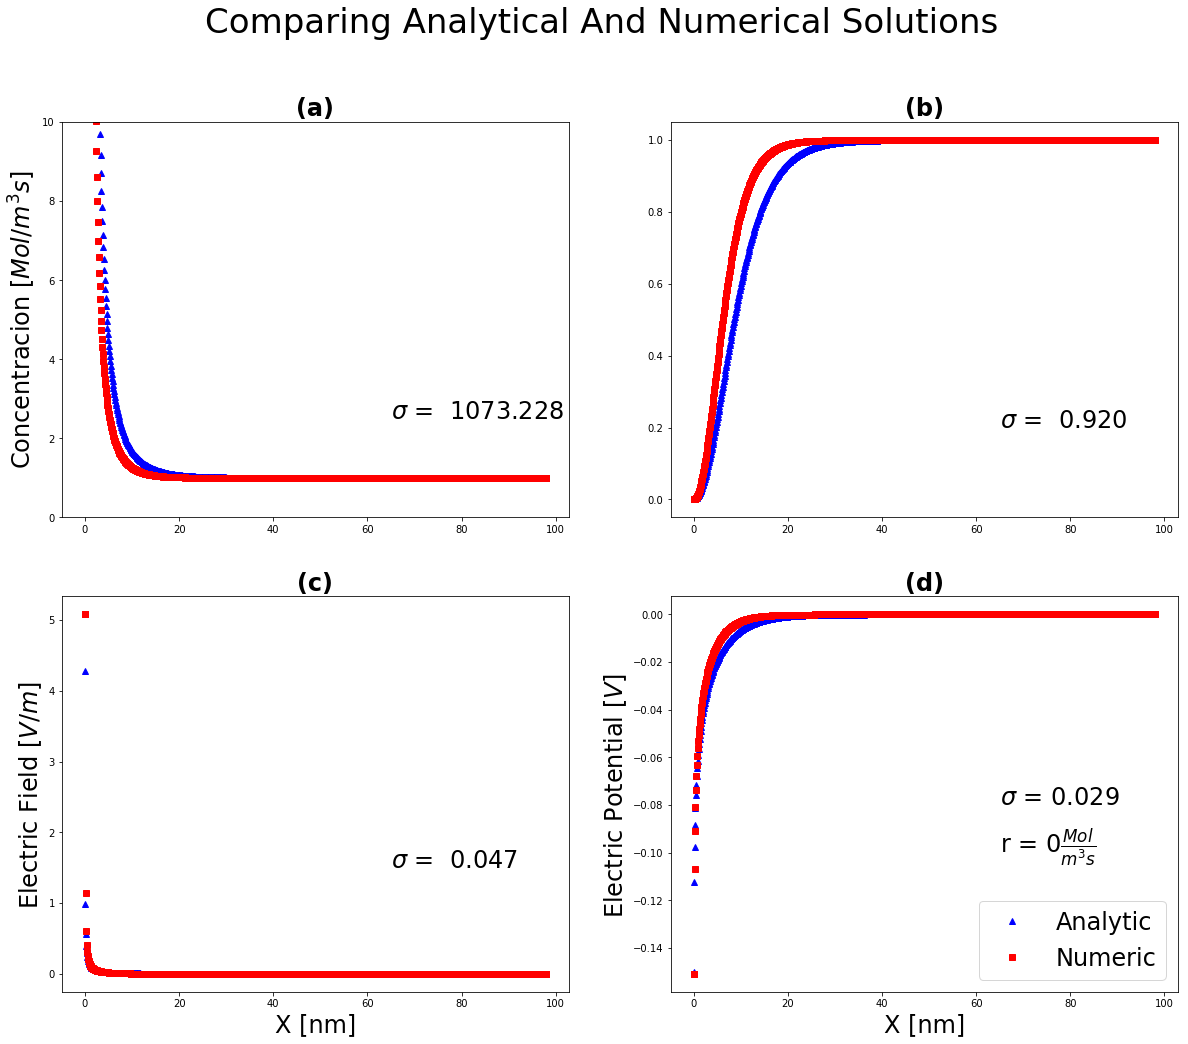

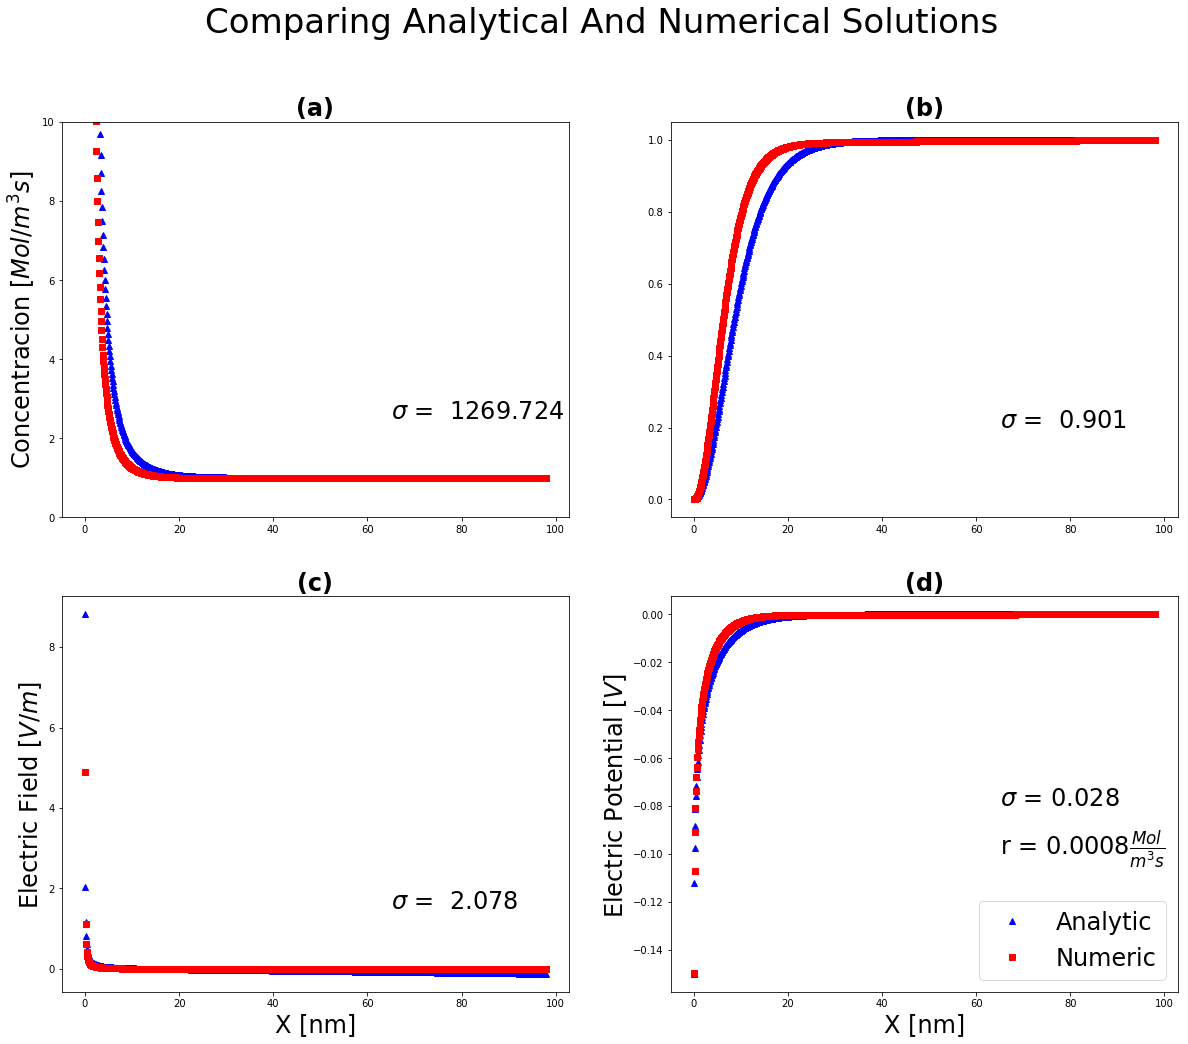

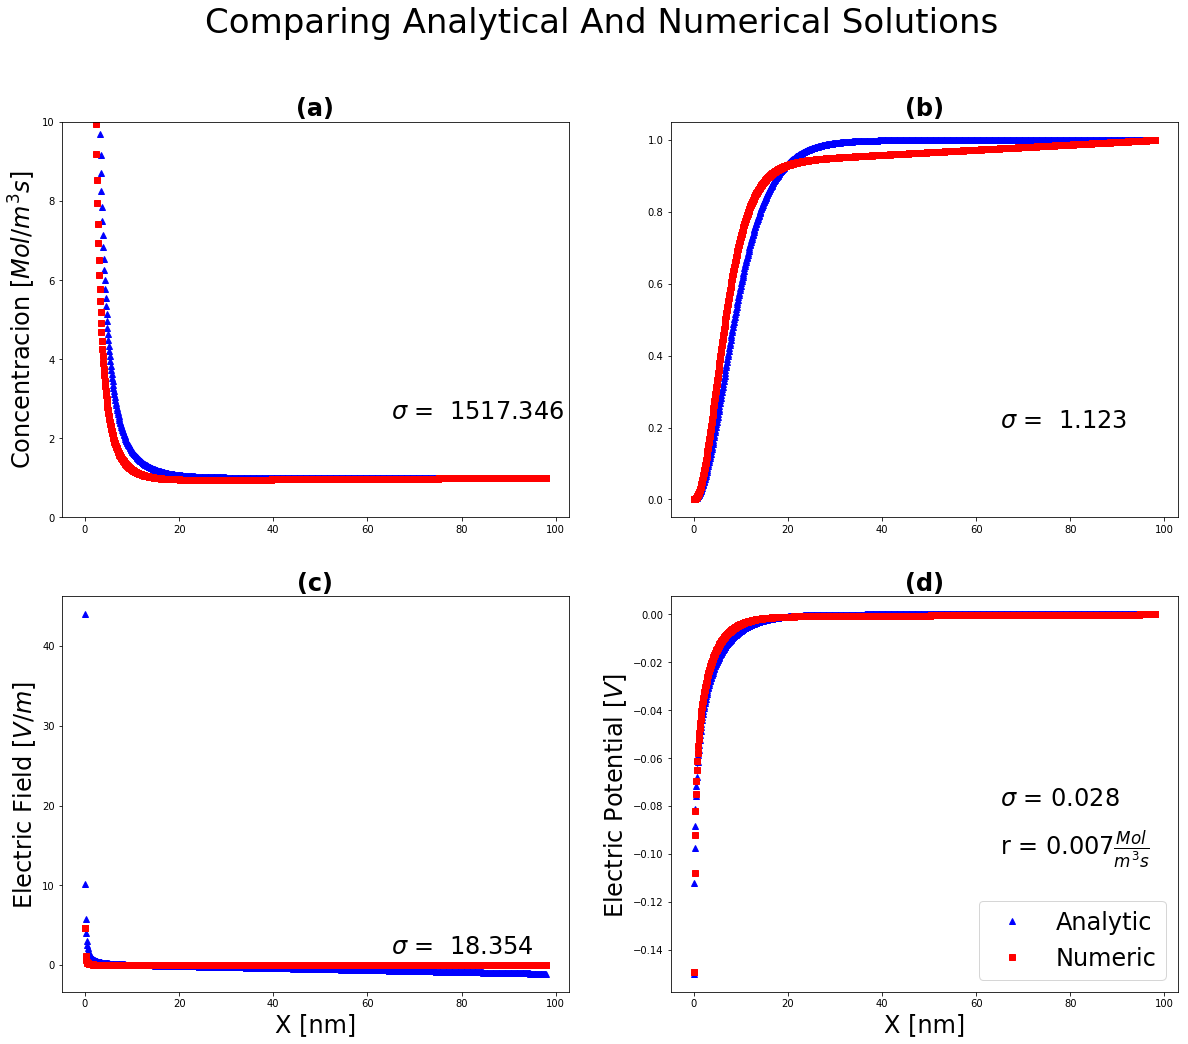

In [82]:
import matplotlib.pyplot as plt
fs = 24
import numpy as np
reactRate = [0, 8E-4, 7E-3]
mw = 6
for i in range(len(reactRate)):
    r0 = reactRate[i]
    anX, anCp = get_static_sol('../results/cp1r'+str(r0)+'.txt')
    numX, numCp = get_static_sol('../results/cp-num-r'+str(r0)+'.txt') 
    anX2, anCm = get_static_sol('../results/cm0r' + str(r0) + '.txt')
    numX2, numCm = get_static_sol('../results/cm-num-r'+str(r0)+'.txt') 
    anX3, anE = get_static_sol('../results/E1-ana-r' + str(r0) + '.txt')
    numX3, numE = get_static_sol('../results/E-num-r' + str(r0) + '.txt') 
    anX4, anPhi = get_static_sol('../results/potential1-A'+str(r0)+'.txt')
    numX4, numPhi = get_static_sol('../results/potential-num-r'+str(r0)+'.txt') 
    
    
    sigPsi = np.sqrt((np.array(anPhi)- np.array(numPhi[1:-1]))**2).sum()/np.sqrt(len(numPhi[1:-1]))
    sigE = np.sqrt((np.array(anE)- np.array(numE[1:-1]))**2).sum()/np.sqrt(len(numE[1:-1]))
    sigCp = np.sqrt((np.array(anCp)- np.array(numCp[1:-1]))**2).sum()/np.sqrt(len(numCp[1:-1]))
    sigCm = np.sqrt((np.array(anCm)- np.array(numCm[1:-1]))**2).sum()/np.sqrt(len(numCm[1:-1]))

    
    plt.figure(figsize=(20,16))
    plt.suptitle('Comparing Analytical And Numerical Solutions', fontsize=34)
    plt.subplot(2,2,1)
    plt.title(r'(a)', fontsize=24, fontweight='bold')
    plt.ylabel(r'Concentracion [$Mol/m^3s$]', fontsize=24)
    plt.text(65, 2.5, r'$\sigma$ =  %.3f'%sigCp, fontsize=fs)

    plt.plot(anX, anCp, 'b^', linewidth=mw)
    plt.plot(numX, numCp, 'rs', markersize=mw)
    plt.ylim(0,10)
    
    plt.subplot(2,2,2)
    plt.title(r'(b)', fontsize=24, fontweight='bold')
    plt.plot(anX2, anCm, 'b^', linewidth=mw)
    plt.plot(numX2, numCm, 'rs', markersize=mw)
    plt.text(65, 0.2, r'$\sigma$ =  %.3f'%sigCm, fontsize=fs)

    plt.subplot(2,2,3)
    plt.title(r'(c)', fontsize=24, fontweight='bold')
    plt.plot(anX3, anE, 'b^', linewidth=mw)
    plt.plot(numX, numE, 'rs', markersize=mw)
    plt.xlabel('X [nm]', fontsize=24)
    plt.ylabel(r'Electric Field [$V/m$] ', fontsize=24)
    plt.text(65, 1.5, r'$\sigma$ =  %.3f'%sigE, fontsize=fs)
    
    plt.subplot(2,2,4)
    plt.title(r'(d)', fontsize=24, fontweight='bold')
    plt.plot(anX4, anPhi, 'b^', linewidth=mw, label='Analytic')
    plt.plot(numX, numPhi, 'rs', markersize=mw, label='Numeric')
    plt.xlabel('X [nm]', fontsize=24)
    plt.text(65, -0.10, 'r = '+str(r0)+r'$\frac{Mol}{m^3s}$', fontsize=fs)
    plt.text(65, -0.08, r'$\sigma$ = %.3f'%sigPsi, fontsize=fs)
    plt.legend(prop={'size': 24})
    plt.ylabel(r'Electric Potential [$V$] ', fontsize=24)
    plt.savefig('comparison'+str(i)+'.eps', format='eps', dpi=1000, fontsize=24, fontweight='bold')
    plt.show()
    

    #plt.plot(111)
    #plt.title(r'Porcentual Error', fontsize=fs)#, fontweight='bold')
    #plt.ylabel(r'Error', fontsize=fs*0.8)
    #Psi_sigma = np.abs((np.array(anPhi) - np.array(numPhi[1:-1]))/np.array(numPhi[1:-1]))
    #plt.plot(anX, Psi_sigma, 'b-', linewidth=mw*0.5, label='r = '+str(r0)+r'$\frac{Mol}{m^3s}$')
    #plt.ylim(0,1)
    #plt.xlabel('X [nm]', fontsize=fs*0.8)

#    plt.legend(prop={'size': 12})
#    plt.savefig('error.eps', format='eps', dpi=1000, fontsize=fs, fontweight='bold')
